In [43]:
import sqlite3 as sql
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import pyarrow as pa
import pyarrow.parquet as pq

In [44]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [45]:
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/"
pmt_dir_21 = root_dir + "21/"
truth_21 = root_dir + "truth_21.parquet"

truth_1 = root_dir + "truth_1.parquet"
truth_27 = root_dir + "truth_27.parquet"

In [46]:
# how many pmtfied files in the directory
print(f"Number of pmtfied files : {len(os.listdir(pmt_dir_21))}")

Number of pmtfied files : 15


In [47]:
dir_99999 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/99999/"
dir_99999_98 = dir_99999 + "98/"
dir_99999_99 = dir_99999 + "99/"
dir_99999_Corsika = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/99999/"

In [48]:
print(f"Number of pmtfied files : {len(os.listdir(dir_99999_98))}")

Number of pmtfied files : 9


In [49]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [50]:
df_99999_98_1 = convertParquetToDF(dir_99999_98 + "PMTfied_1.parquet")

In [51]:
df_99999_98_truth = convertParquetToDF(dir_99999 + "truth_98.parquet")

In [52]:
df_99999_98_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,199009800001419,1419,124.970001,-131.250000,476.630005,-158.001236,-400.039368,152.750031,0.0444,1.00,...,0.925,0,-1,-1,12716.0,-1.0,-1.0,-1.0,-1.0,5994.851074
1,199009800001419,1419,248.149994,-111.870003,412.929993,-34.821243,-380.659363,89.050034,0.0444,1.00,...,1.175,0,-1,-1,12156.0,-1.0,-1.0,-1.0,-1.0,5730.864746
2,199009800001419,1419,194.339996,-30.920000,470.049988,-88.631241,-299.709381,146.170029,0.0444,1.00,...,0.975,1,-1,-1,10795.0,-1.0,-1.0,-1.0,-1.0,5089.283203
3,199009800001419,1419,194.339996,-30.920000,453.029999,-88.631241,-299.709381,129.150024,0.0444,1.00,...,1.100,1,1,-1,11159.0,11237.0,-1.0,0.0,78.0,5279.355469
4,199009800001419,1419,194.339996,-30.920000,401.970001,-88.631241,-299.709381,78.090027,0.0444,1.00,...,0.825,0,-1,-1,11316.0,-1.0,-1.0,-1.0,-1.0,5334.884766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,199009800001428,1428,57.200001,-105.519997,-364.649994,-2.138501,7.737176,-133.666534,0.0444,1.35,...,1.125,0,-1,-1,12354.0,-1.0,-1.0,-1.0,-1.0,5824.202637
1533,199009800001428,1428,57.200001,-105.519997,-378.670013,-2.138501,7.737176,-147.686539,0.0444,1.35,...,0.675,0,-1,-1,10979.0,-1.0,-1.0,-1.0,-1.0,5176.021484
1534,199009800001428,1428,-9.680000,-79.500000,-156.410004,-69.018501,33.757175,74.573456,0.0444,1.35,...,0.875,0,-1,-1,12158.0,-1.0,-1.0,-1.0,-1.0,5731.807617
1535,199009800001428,1428,-9.680000,-79.500000,-275.559998,-69.018501,33.757175,-44.576542,0.0444,1.35,...,1.375,0,-1,-1,11455.0,-1.0,-1.0,-1.0,-1.0,5400.410156


In [53]:
df_99999_98_truth

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid
0,199009800001419,1419,99999,98,1,213,213,1.228535e+06,4.320621,0.735934,14.0
1,199009800001420,1420,99999,98,1,317,530,7.616068e+06,1.721122,1.112967,-14.0
2,199009800001421,1421,99999,98,1,189,719,4.883525e+07,4.324323,1.747017,-14.0
3,199009800001422,1422,99999,98,1,40,759,7.368295e+07,5.271961,2.011045,-14.0
4,199009800001423,1423,99999,98,1,309,1068,2.270513e+07,5.554580,1.739628,-14.0
...,...,...,...,...,...,...,...,...,...,...,...
69,199009800001488,1488,99999,98,7,243,4017,7.586169e+06,3.289613,0.991989,14.0
70,199009800001489,1489,99999,98,8,24,24,2.344431e+07,2.390422,0.236707,-14.0
71,199009800001490,1490,99999,98,8,393,417,1.908850e+07,5.173692,0.628225,-14.0
72,199009800001491,1491,99999,98,8,961,1378,4.262259e+07,4.707403,1.459073,-14.0


In [54]:
df_99999_98_1[["dom_x_rel", "dom_y_rel", "dom_z_rel"]]

,dom_x_rel,dom_y_rel,dom_z_rel
0,-158.001236,-400.039368,152.750031
1,-34.821243,-380.659363,89.050034
2,-88.631241,-299.709381,146.170029
3,-88.631241,-299.709381,129.150024
4,-88.631241,-299.709381,78.090027
...,...,...,...
1532,-2.138501,7.737176,-133.666534
1533,-2.138501,7.737176,-147.686539
1534,-69.018501,33.757175,74.573456
1535,-69.018501,33.757175,-44.576542


In [55]:
df_99999_98_1[["dom_x_rel", "dom_y_rel", "dom_z_rel"]].describe()

,dom_x_rel,dom_y_rel,dom_z_rel
count,1537.000000,1537.000000,1537.000000
mean,-21.870615,23.349905,-8.857996
std,146.952805,177.395126,122.697540
min,-496.876312,-479.066589,-396.859955
25%,-108.501244,-90.336601,-80.649971
50%,-22.188471,32.097382,-7.206541
75%,53.851498,146.437378,69.661201
max,420.445099,554.267395,539.783447


In [ ]:
Gandalf: Run All shall not pass!

SyntaxError: invalid syntax (1929833197.py, line 1)

In [ ]:
truth_df = convertParquetToDF(truth_21)

In [ ]:
pmtfied_df_1 = convertParquetToDF(pmt_dir_21 + os.listdir(pmt_dir_21)[0])
pmtfied_df_2 = convertParquetToDF(pmt_dir_21 + os.listdir(pmt_dir_21)[1])
pmtfied_df_3 = convertParquetToDF(pmt_dir_21 + os.listdir(pmt_dir_21)[2])

In [ ]:
truth_df

,event_no,subdirectory_no,db_file_no,shard_index,file_no,N_doms,offset,energy,azimuth,zenith,pid
0,584664,22012,21,1,1,304,304,2.755813e+07,4.339634,1.260234,14.0
1,584665,22012,21,1,1,380,684,2.406381e+06,1.403380,2.261166,-14.0
2,584666,22012,21,1,1,36,720,2.206345e+06,4.522066,0.506581,-14.0
3,584667,22012,21,1,1,463,1183,1.602858e+07,2.264666,1.033923,14.0
4,584668,22012,21,1,1,514,1697,4.875203e+07,5.391671,0.997101,-14.0
...,...,...,...,...,...,...,...,...,...,...,...
29560,614308,22012,21,15,15,605,576636,6.656234e+07,1.559845,1.321531,-14.0
29561,614309,22012,21,15,15,69,576705,1.090324e+07,5.683992,2.023259,-14.0
29562,614310,22012,21,15,15,131,576836,1.585524e+06,2.541310,0.838980,-14.0
29563,614311,22012,21,15,15,421,577257,3.494037e+06,1.957469,0.047720,-14.0


In [ ]:
def checkNcolumns(pmt_dir):
    for file in os.listdir(pmt_dir):
        df = convertParquetToDF(pmt_dir + file)
        print(f"{file} : {len(df.columns)}")

In [ ]:
checkNcolumns(pmt_dir_21)

PMTfied_1.parquet : 26
PMTfied_5.parquet : 25
PMTfied_9.parquet : 25
PMTfied_10.parquet : 25
PMTfied_14.parquet : 25
PMTfied_8.parquet : 25
PMTfied_4.parquet : 25
PMTfied_11.parquet : 25
PMTfied_15.parquet : 25
PMTfied_13.parquet : 25
PMTfied_2.parquet : 25
PMTfied_6.parquet : 25
PMTfied_12.parquet : 25
PMTfied_3.parquet : 25
PMTfied_7.parquet : 25


In [ ]:
pmtfied_df_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,1221584664,584664,114.389999,-461.989990,464.619995,0.000000e+00,0.000000e+00,0.000000,0.0444,1.0,...,1.075,0,-1,-1,12687.0,-1.0,-1.0,-1.0,-1.0,5981.180664
1,1221584664,584664,35.540001,-364.829987,497.709991,-7.105427e-15,1.136868e-13,38.593739,0.0444,1.0,...,3.650,1,1,1,9950.0,10199.0,10233.0,0.0,249.0,126.159508
2,1221584664,584664,35.540001,-364.829987,480.690002,-7.105427e-15,1.136868e-13,21.573738,0.0444,1.0,...,0.825,1,-1,-1,10406.0,-1.0,-1.0,-1.0,-1.0,4905.906738
3,1221584664,584664,35.540001,-364.829987,463.670013,-7.105427e-15,1.136868e-13,4.553738,0.0444,1.0,...,3.950,1,1,1,10514.0,10833.0,10913.0,0.0,319.0,172.356873
4,1221584664,584664,35.540001,-364.829987,446.649994,-7.105427e-15,1.136868e-13,-12.466262,0.0444,1.0,...,1.300,1,1,-1,10494.0,10754.0,-1.0,0.0,260.0,5009.797852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713628,1221586747,586747,-166.399994,-287.790009,-506.440002,2.842171e-14,0.000000e+00,-35.289173,0.0444,1.0,...,0.875,1,-1,-1,14269.0,-1.0,-1.0,-1.0,-1.0,6726.942383
713629,1221586747,586747,-492.429993,-230.160004,-455.559998,5.684342e-14,0.000000e+00,25.530001,0.0444,1.0,...,0.325,1,-1,-1,13281.0,-1.0,-1.0,-1.0,-1.0,6261.194824
713630,1221586747,586747,-492.429993,-230.160004,-489.600006,5.684342e-14,0.000000e+00,-8.509999,0.0444,1.0,...,0.975,1,-1,-1,12540.0,-1.0,-1.0,-1.0,-1.0,5911.884277
713631,1221586747,586747,-368.929993,-210.229996,-486.670013,0.000000e+00,0.000000e+00,0.000000,0.0444,1.0,...,0.625,0,-1,-1,12730.0,-1.0,-1.0,-1.0,-1.0,6001.451172


In [ ]:
pmtfied_df_2

,event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,saturation_status,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,592748,-166.399994,-287.790009,174.259995,-2.842171e-14,5.684342e-14,89.722908,0.0444,1.00,-1,...,0.825,1,-1,-1,9997.0,-1.0,-1.0,-1.0,-1.0,4713.102539
1,592748,-166.399994,-287.790009,140.220001,-2.842171e-14,5.684342e-14,55.682907,0.0444,1.00,-1,...,0.575,1,-1,-1,9867.0,-1.0,-1.0,-1.0,-1.0,4651.819824
2,592748,-166.399994,-287.790009,123.199997,-2.842171e-14,5.684342e-14,38.662910,0.0444,1.00,-1,...,0.275,1,-1,-1,9991.0,-1.0,-1.0,-1.0,-1.0,4710.273926
3,592748,-166.399994,-287.790009,106.180000,-2.842171e-14,5.684342e-14,21.642908,0.0444,1.00,-1,...,0.975,1,-1,-1,9996.0,-1.0,-1.0,-1.0,-1.0,4712.630859
4,592748,-166.399994,-287.790009,89.160004,-2.842171e-14,5.684342e-14,4.622909,0.0444,1.00,-1,...,1.575,1,-1,-1,9872.0,-1.0,-1.0,-1.0,-1.0,4654.176758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687082,594747,429.760010,351.019989,-498.079987,5.684342e-14,0.000000e+00,-14.679750,0.0444,1.00,-1,...,1.425,0,-1,-1,14783.0,-1.0,-1.0,-1.0,-1.0,6969.244629
687083,594747,41.599998,35.490002,-403.200012,0.000000e+00,0.000000e+00,0.000000,0.0444,1.35,-1,...,0.925,0,-1,-1,13046.0,-1.0,-1.0,-1.0,-1.0,6150.414551
687084,594747,113.190002,-60.470001,-406.399994,1.421085e-14,0.000000e+00,14.578199,0.0444,1.35,-1,...,0.925,0,-1,-1,12611.0,-1.0,-1.0,-1.0,-1.0,5945.354004
687085,594747,113.190002,-60.470001,-462.470001,1.421085e-14,0.000000e+00,-41.491802,0.0444,1.35,-1,...,0.325,0,-1,-1,13656.0,-1.0,-1.0,-1.0,-1.0,6437.971680


In [ ]:
pmtfied_df_3

,event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,saturation_status,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,600748,500.429993,-58.450001,331.649994,-5.684342e-14,7.105427e-15,104.810020,0.0444,1.0,0,...,1.275,1,-1,-1,13557.0,-1.0,-1.0,-1.0,-1.0,6391.302734
1,600748,500.429993,-58.450001,314.630005,-5.684342e-14,7.105427e-15,87.790024,0.0444,1.0,0,...,1.875,1,1,0,13229.0,14730.0,23988.0,0.0,1501.0,4757.679688
2,600748,500.429993,-58.450001,297.609985,-5.684342e-14,7.105427e-15,70.770027,0.0444,1.0,0,...,1.475,1,-1,-1,12607.0,-1.0,-1.0,-1.0,-1.0,5943.468262
3,600748,500.429993,-58.450001,280.579987,-5.684342e-14,7.105427e-15,53.740025,0.0444,1.0,0,...,4.325,1,1,1,12393.0,12471.0,12586.0,0.0,193.0,79.273087
4,600748,500.429993,-58.450001,263.559998,-5.684342e-14,7.105427e-15,36.720024,0.0444,1.0,0,...,2.700,1,1,-1,12425.0,12631.0,-1.0,0.0,206.0,5906.826172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717653,602747,303.410004,335.640015,461.890015,5.684342e-14,0.000000e+00,7.154905,0.0444,1.0,-1,...,1.450,1,1,-1,13736.0,13861.0,-1.0,0.0,125.0,6505.346680
717654,602747,303.410004,335.640015,427.850006,5.684342e-14,0.000000e+00,-26.885096,0.0444,1.0,-1,...,1.650,1,1,-1,13846.0,14604.0,-1.0,0.0,0.0,6713.336426
717655,602747,429.760010,351.019989,438.059998,-5.684342e-14,0.000000e+00,27.398048,0.0444,1.0,-1,...,1.225,0,-1,-1,14290.0,-1.0,-1.0,-1.0,-1.0,6736.841797
717656,602747,429.760010,351.019989,369.980011,-5.684342e-14,0.000000e+00,-40.681953,0.0444,1.0,-1,...,0.825,0,-1,-1,16198.0,-1.0,-1.0,-1.0,-1.0,7636.281738


In [ ]:
df_truth_1 = convertParquetToDF(truth_1)

In [ ]:
df_truth_27 = convertParquetToDF(truth_27)

count    2.938600e+04
mean     2.267654e+07
std      2.538212e+07
min      1.000207e+06
25%      3.451816e+06
50%      1.121124e+07
75%      3.428168e+07
max      9.999616e+07
Name: energy, dtype: float64

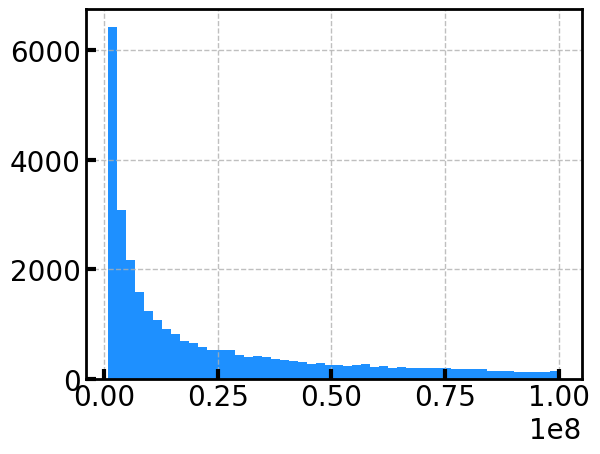

In [ ]:
df_truth_1['energy'].hist(bins=50)
df_truth_1['energy'].describe()

count    2.796700e+04
mean     2.271997e+07
std      2.546016e+07
min      1.000226e+06
25%      3.477298e+06
50%      1.135521e+07
75%      3.430493e+07
max      9.998384e+07
Name: energy, dtype: float64

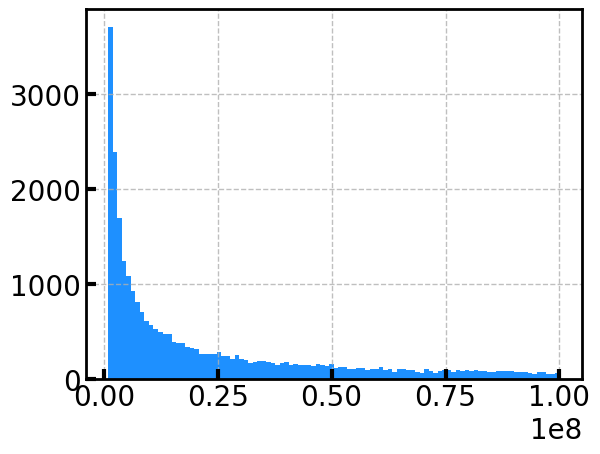

In [ ]:
df_truth_27['energy'].hist(bins=100)
df_truth_27['energy'].describe()

In [ ]:
def printStatsForAllParquetInDir(directory: str):
    for file in os.listdir(directory):
        if file.endswith('.parquet'):
            print(f"Statistics for {file}")
            # Assuming convertParquetToDF is a pre-defined function that reads a parquet file into a DataFrame
            df = convertParquetToDF(os.path.join(directory, file))
            stats = pd.DataFrame({
                "Metric": ["Min", "Max", "Mean", "Median"],
                "Energy": [
                    df['energy'].min(),
                    df['energy'].max(),
                    df['energy'].mean(),
                    df['energy'].median()
                ],
                "N_doms": [
                    df['N_doms'].min(),
                    df['N_doms'].max(),
                    df['N_doms'].mean(),
                    df['N_doms'].median()
                ]
            })
            print(stats)


In [ ]:
printStatsForAllParquetInDir(root_dir)

Statistics for truth_8.parquet
   Metric        Energy       N_doms
0     Min  1.000074e+06     4.000000
1     Max  9.998628e+07  2531.000000
2    Mean  2.273861e+07   358.246864
3  Median  1.133401e+07   201.000000
Statistics for truth_27.parquet
   Metric        Energy       N_doms
0     Min  1.000226e+06     4.000000
1     Max  9.998384e+07  2651.000000
2    Mean  2.271997e+07   355.856939
3  Median  1.135521e+07   203.000000
Statistics for truth_4.parquet
   Metric        Energy      N_doms
0     Min  1.000129e+06     5.00000
1     Max  9.998930e+07  2614.00000
2    Mean  2.282914e+07   357.77988
3  Median  1.132350e+07   203.00000
Statistics for truth_23.parquet
   Metric        Energy       N_doms
0     Min  1.000007e+06     4.000000
1     Max  9.999438e+07  2722.000000
2    Mean  2.270526e+07   354.985484
3  Median  1.116558e+07   199.000000
Statistics for truth_15.parquet
   Metric        Energy       N_doms
0     Min  1.000207e+06     4.000000
1     Max  9.996645e+07  2604.000

In [ ]:
def getFirstAndLastEventNumber(directory: str, file_extension: str):
    first_event_numbers = []
    last_event_numbers = []
    file_names = []
    
    for file in tqdm(os.listdir(directory)):
        if file.endswith(file_extension):
            if file_extension == '.parquet':
                df = convertParquetToDF(os.path.join(directory, file))
                first_event_numbers.append(df['event_no'].min())
                last_event_numbers.append(df['event_no'].max())
            elif file_extension == '.db':
                conn = sql.connect(os.path.join(directory, file))
                df = pd.read_sql_query("SELECT * FROM truth", conn)
                first_event_numbers.append(df['event_no'].min())
                last_event_numbers.append(df['event_no'].max())
            file_names.append(file)
    
    return pd.DataFrame({
        "File Name": file_names,
        "First event_no": first_event_numbers,
        "Last event_no": last_event_numbers
    })

In [ ]:
def checkOverlappingEventsWithRanges(directory: str, file_extension: str):
    file_event_df = getFirstAndLastEventNumber(directory, file_extension)
    file_event_df = file_event_df.sort_values(by="First event_no").reset_index(drop=True)
    
    overlaps = []
    for i in range(1, len(file_event_df)):
        prev_last = file_event_df.loc[i - 1, "Last event_no"]
        curr_first = file_event_df.loc[i, "First event_no"]
        curr_last = file_event_df.loc[i, "Last event_no"]
        
        if curr_first <= prev_last:
            # Overlapping range
            overlap_start = curr_first
            overlap_end = min(prev_last, curr_last)
            overlaps.append({
                "File 1": file_event_df.loc[i - 1, "File Name"],
                "File 2": file_event_df.loc[i, "File Name"],
                "Overlap Range": (overlap_start, overlap_end),
                "Overlap Size": overlap_end - overlap_start + 1
            })
    
    return overlaps

In [ ]:
checkOverlappingEventsWithRanges(root_dir, ".parquet")
# 0.1 sec

100%|██████████| 54/54 [00:00<00:00, 306.17it/s]


[{'File 1': 'truth_6.parquet',
  'File 2': 'truth_7.parquet',
  'Overlap Range': (175338, 175459),
  'Overlap Size': 122},
 {'File 1': 'truth_9.parquet',
  'File 2': 'truth_10.parquet',
  'Overlap Range': (262585, 262799),
  'Overlap Size': 215},
 {'File 1': 'truth_10.parquet',
  'File 2': 'truth_11.parquet',
  'Overlap Range': (292034, 292172),
  'Overlap Size': 139},
 {'File 1': 'truth_17.parquet',
  'File 2': 'truth_18.parquet',
  'Overlap Range': (496058, 496447),
  'Overlap Size': 390},
 {'File 1': 'truth_18.parquet',
  'File 2': 'truth_19.parquet',
  'Overlap Range': (525527, 525683),
  'Overlap Size': 157},
 {'File 1': 'truth_19.parquet',
  'File 2': 'truth_20.parquet',
  'Overlap Range': (554847, 555000),
  'Overlap Size': 154},
 {'File 1': 'truth_20.parquet',
  'File 2': 'truth_21.parquet',
  'Overlap Range': (584664, 584827),
  'Overlap Size': 164},
 {'File 1': 'truth_23.parquet',
  'File 2': 'truth_24.parquet',
  'Overlap Range': (672805, 672961),
  'Overlap Size': 157},
 {'

In [ ]:
# let's see the original pulsemap event_no
dir_22012 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22012"

In [ ]:
# checkOverlappingEventsWithRanges(dir_22012, ".db")
# 20 min